# Data Science and Business Analytics (GRIP June 2021)

## Task 2 : Exploratory Data Analysis - Retail

## Submitted By: Nikita Gulati

## Perform 'Exploratory Data Analysis' on dataset 'SampleSuperstore' and try to find out the weak areas where you can work to make more profit

In [1]:
import numpy as np
import pandas as pd

# for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

## Reading the DataSet

In [2]:
#Loading the data
dataset = pd.read_csv('SampleSuperstore.csv')
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Description

In [3]:
dataset.shape

(9994, 13)

In [4]:
dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Pre-Processing

In [7]:
# Duplicated data
dataset[dataset.duplicated() == True]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [8]:
dataset = dataset.drop_duplicates()
dataset.shape

(9977, 13)

In [9]:
import missingno as msn

In [10]:
# Checking missing values
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<AxesSubplot:>

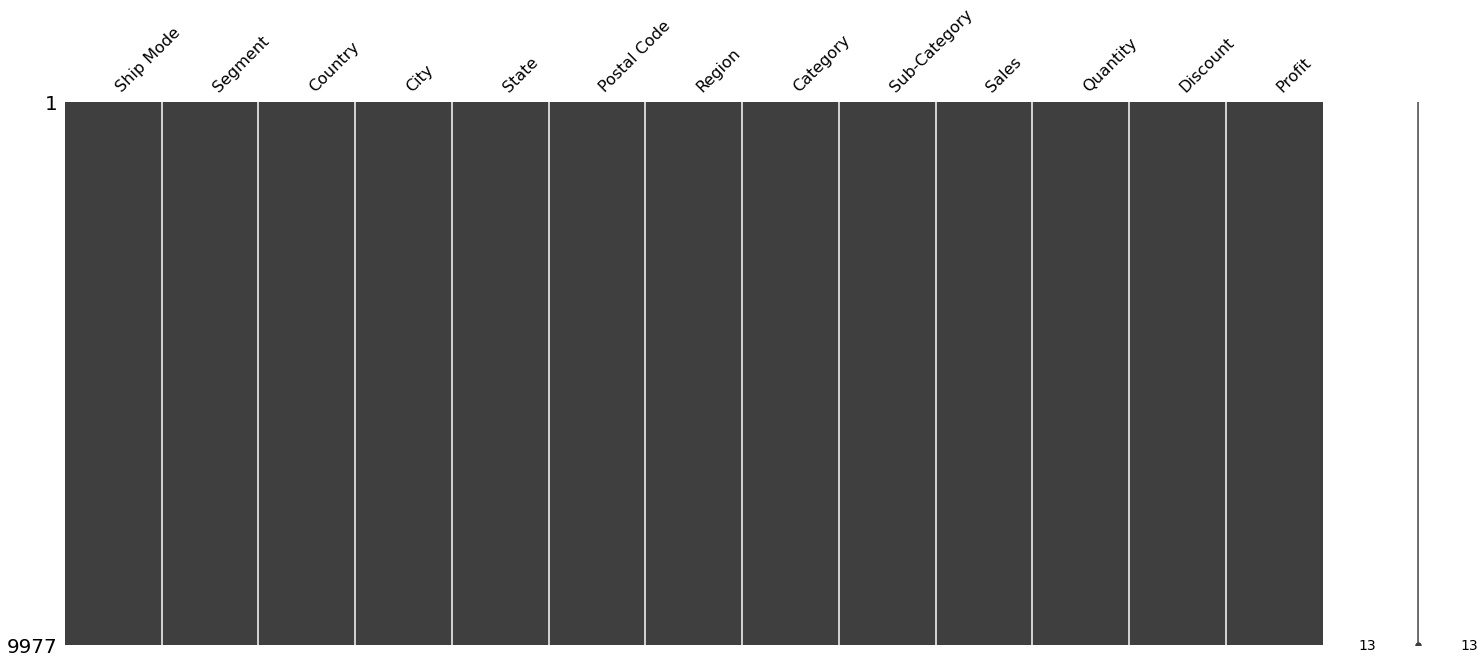

In [11]:
msn.matrix(dataset)

## Exploratory Data Analysis

### Univariate Analysis

In [12]:
dataset['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

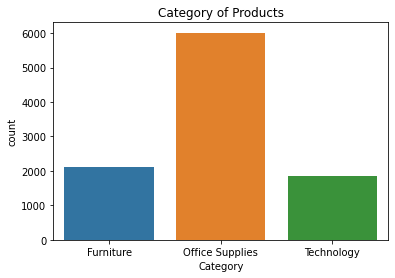

In [13]:
sns.countplot(x=dataset['Category'])
plt.title("Category of Products")
plt.show()

In [14]:
#Checking the type of customers that buy products from the store.
dataset['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

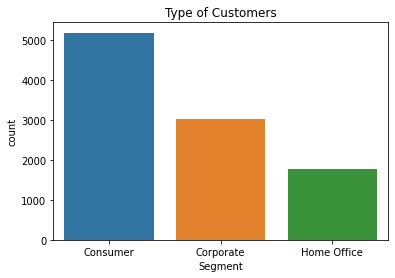

In [15]:
sns.countplot(x=dataset['Segment'])
plt.title("Type of Customers")
plt.show()

In [16]:
#Checking for the different sub-categories of the products sold in the store.
dataset['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

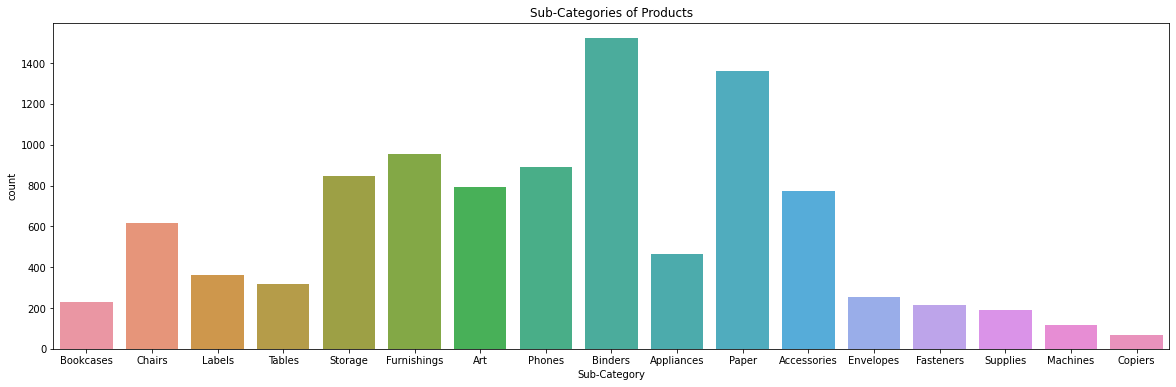

In [17]:
plt.figure(figsize=(20,6))
sns.countplot(x=dataset['Sub-Category'])
plt.title("Sub-Categories of Products")
plt.show()

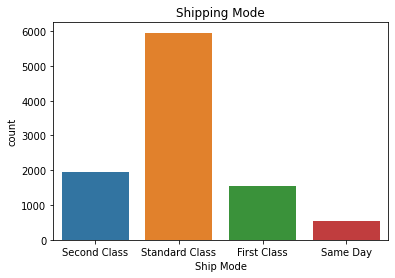

In [18]:
sns.countplot(x=dataset['Ship Mode'])
plt.title("Shipping Mode")
plt.show()

In [19]:
#State-wise dealings
state = dataset['State'].value_counts()
state.mean()

203.6122448979592

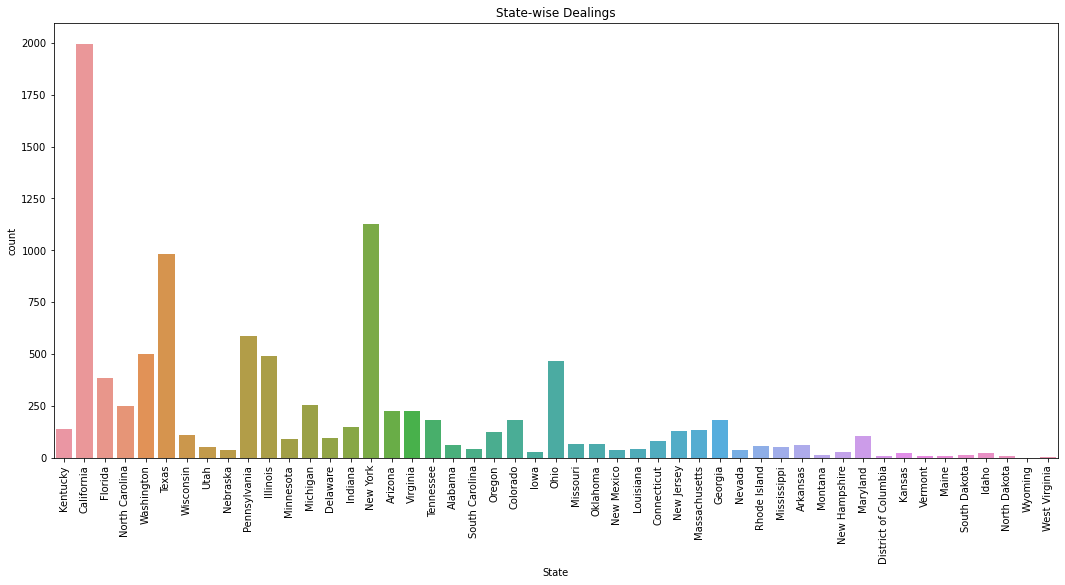

In [20]:
plt.figure(figsize=(18,8))
sns.countplot(x=dataset['State'])
plt.title("State-wise Dealings")
plt.xticks(rotation=90)
plt.show()

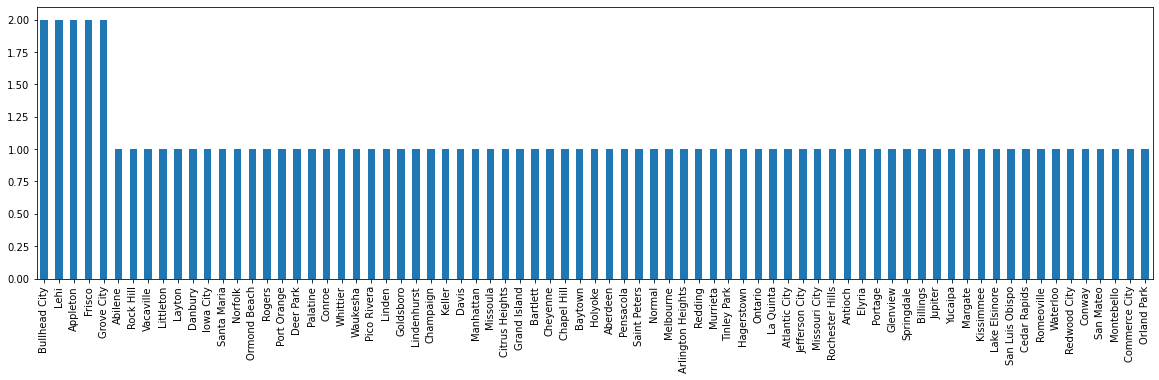

In [21]:
#City-wise dealings
city = dataset['City'].value_counts()
city = city.tail(75)
city.plot(kind='bar', figsize=(20,5))
plt.show()

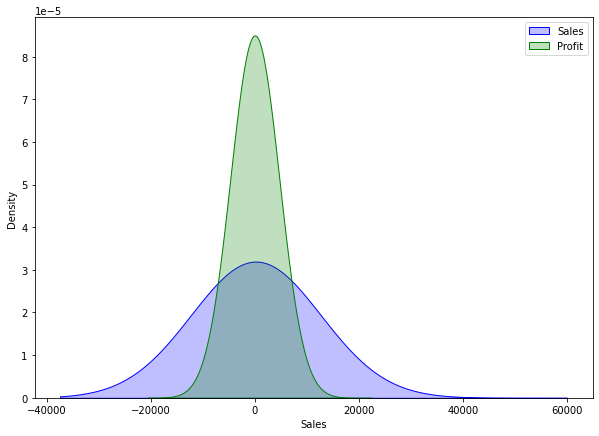

In [22]:
plt.figure(figsize=(10,7))
sns.kdeplot(dataset['Sales'], color='blue', label='Sales', shade=True, bw_method=20)
sns.kdeplot(dataset['Profit'], color='green', label='Profit', shade=True, bw_method=20)
plt.legend()
plt.show()

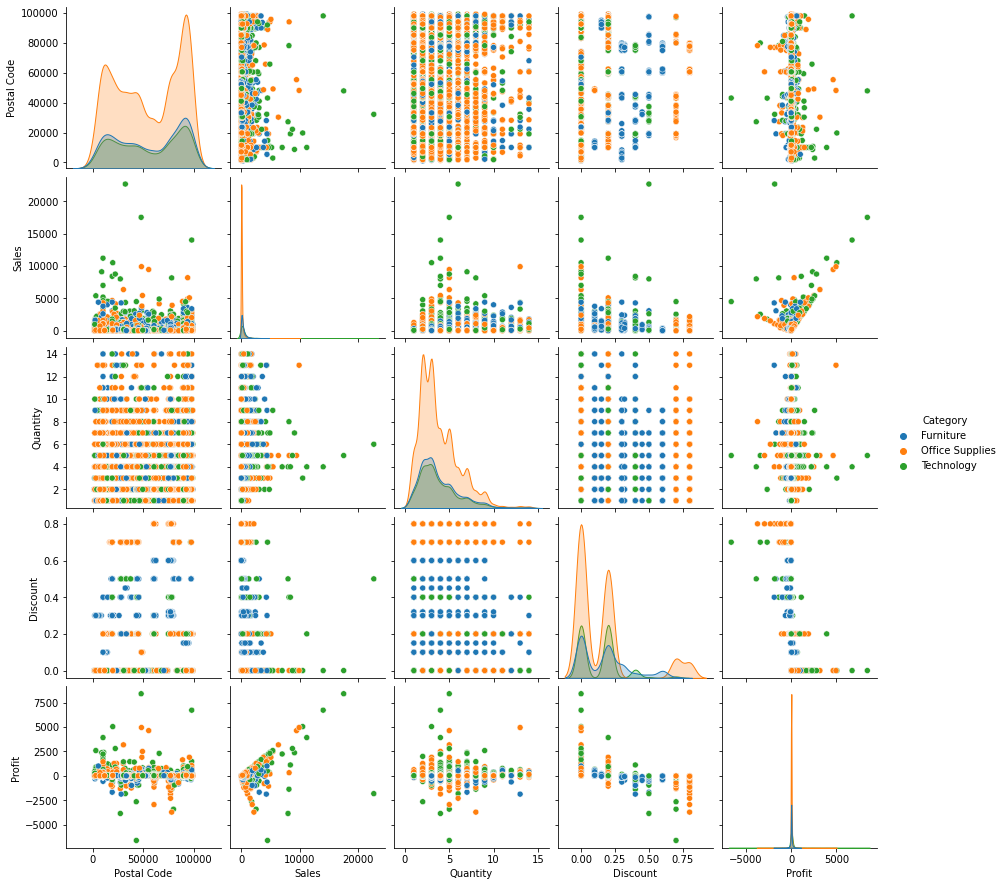

In [23]:
sns.pairplot(dataset, hue='Category')
plt.show()

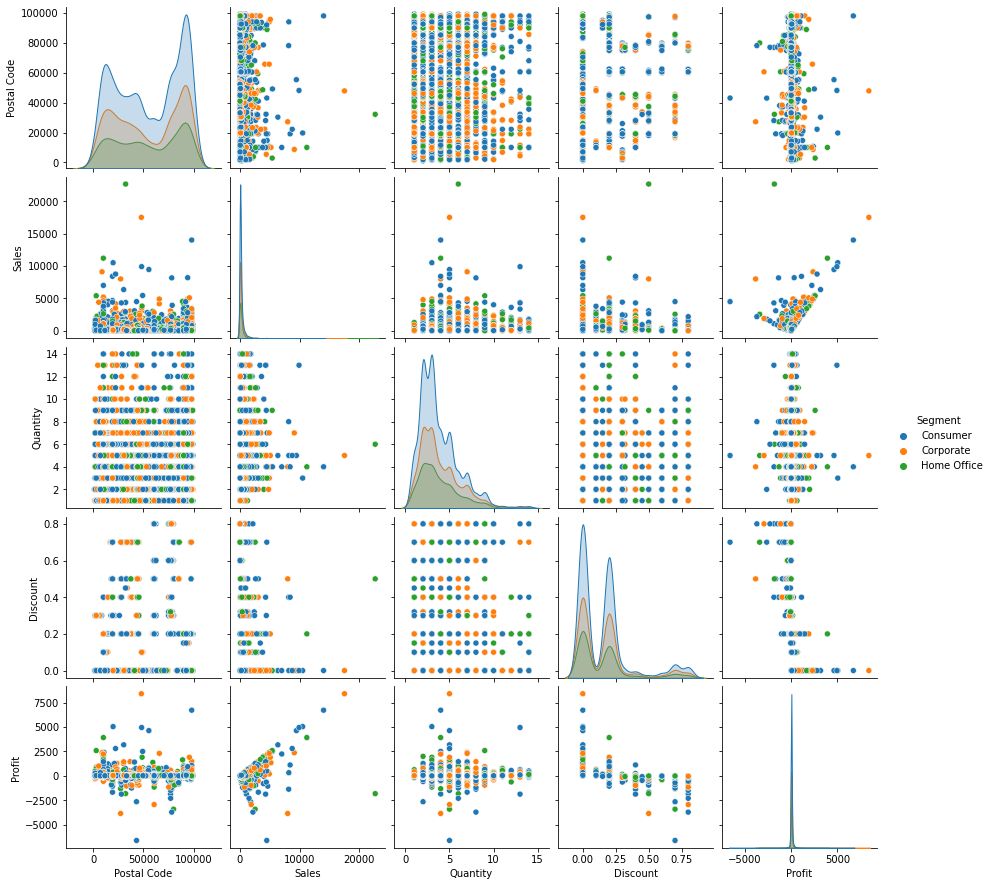

In [24]:
sns.pairplot(dataset, hue='Segment')
plt.show()

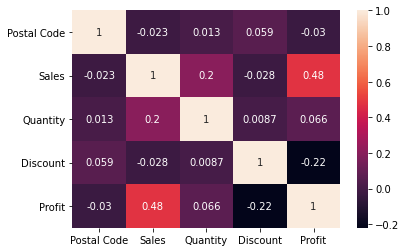

In [25]:
correlation = dataset.corr()
sns.heatmap(correlation, annot=True)
plt.show()

In [26]:
df = dataset.groupby(['Segment'])[['Quantity','Sales','Profit','Discount']].mean()
df

,Quantity,Sales,Profit,Discount
Segment,,,,
Consumer,3.761721,223.969279,25.855188,0.158308
Corporate,3.844444,234.185781,30.499164,0.158159
Home Office,3.784148,241.311234,33.883643,0.147178


In [27]:
df = dataset.groupby(['State'])[['Profit']].mean()
df.head()

,Profit
State,
Alabama,94.865989
Arizona,-15.303235
Arkansas,66.811452
California,38.241878
Colorado,-35.867351


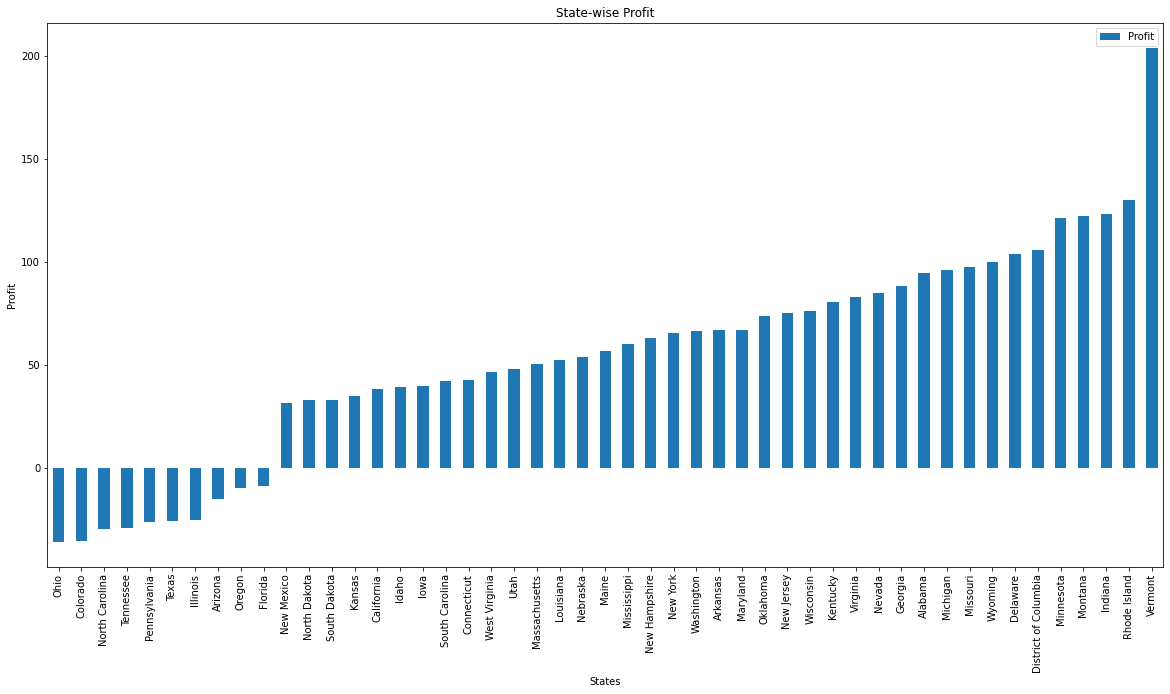

In [28]:
profit_state = df.sort_values('Profit')
profit_state[['Profit']].plot(kind='bar', figsize=(20,10))
plt.title("State-wise Profit")
plt.xlabel("States")
plt.ylabel("Profit")
plt.show()

In [29]:
df = dataset.groupby(['City'])[['Profit']].mean()
df.describe()

,Profit
count,531.000000
mean,28.747414
std,67.626682
min,-200.619160
25%,2.131924
50%,19.239333
75%,49.449500
max,642.885750


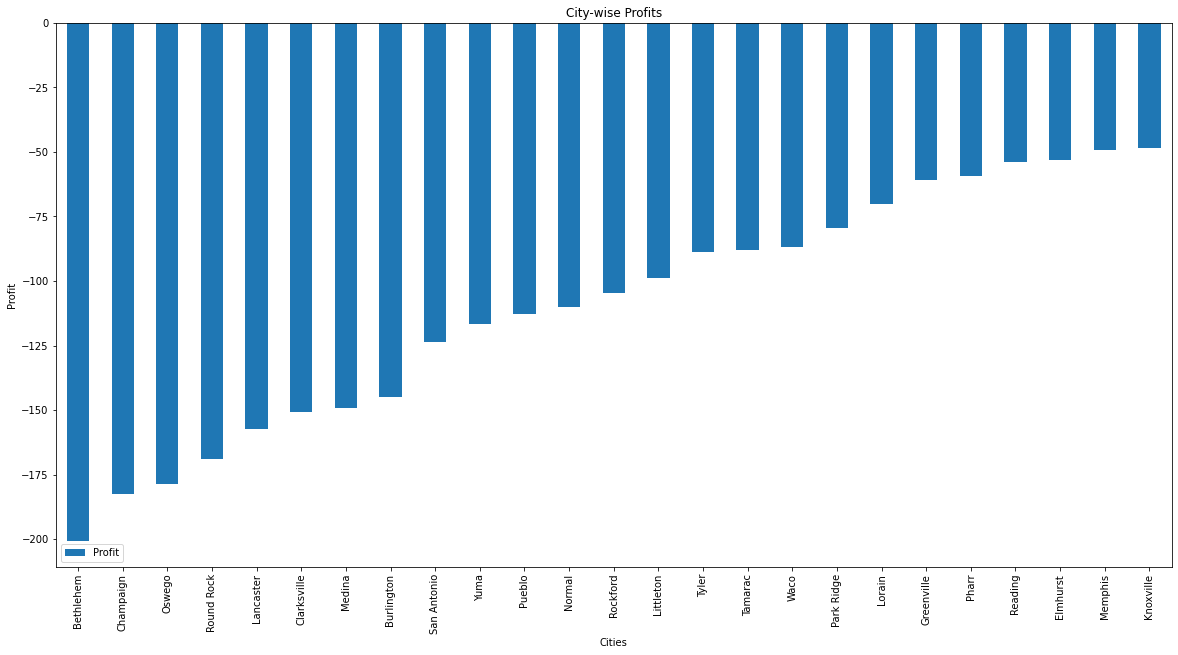

In [30]:
profit_city = df.sort_values('Profit').head(25)
profit_city[['Profit']].plot(kind='bar', figsize=(20,10))
plt.title("City-wise Profits")
plt.xlabel("Cities")
plt.ylabel("Profit")
plt.show()

In [31]:
df = dataset.groupby(['Category'])[['Profit']].mean()
df.head()

,Profit
Category,
Furniture,8.697740
Office Supplies,20.353403
Technology,78.752002


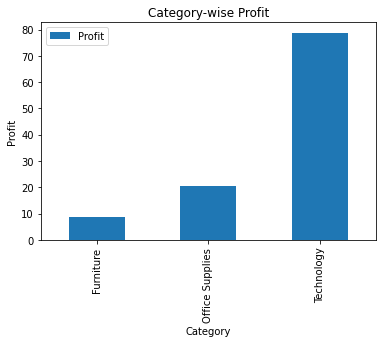

In [32]:
profit_category = df.sort_values('Profit')
profit_category[['Profit']].plot(kind='bar')
plt.title("Category-wise Profit")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.show()

In [33]:
df = dataset.groupby(['Sub-Category'])[['Profit']].mean()
df

,Profit
Sub-Category,
Accessories,54.111788
Appliances,38.922758
Art,8.207059
Binders,19.860710
Bookcases,-15.230509
Chairs,43.198582
Copiers,817.909190
Envelopes,27.418019
Fasteners,4.375660


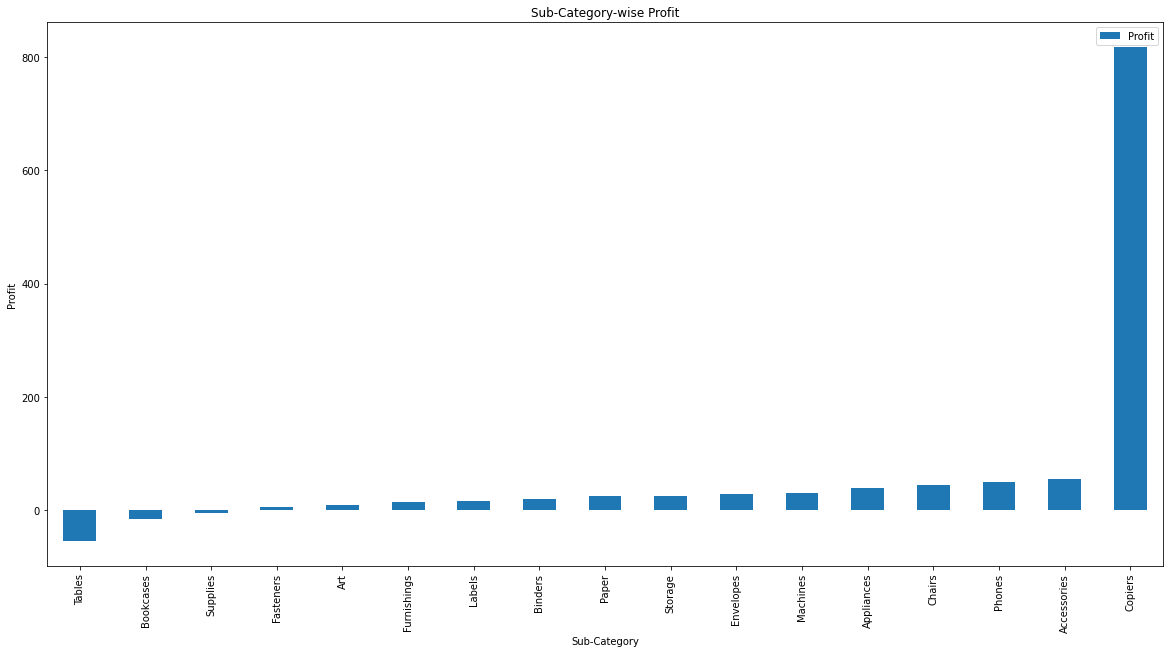

In [34]:
profit_sub_category = df.sort_values('Profit')
profit_sub_category[['Profit']].plot(kind='bar', figsize=(20,10))
plt.title("Sub-Category-wise Profit")
plt.xlabel("Sub-Category")
plt.ylabel("Profit")
plt.show()

In [35]:
df = dataset.groupby(['Category'])[['Sales']].mean()
df.head()

,Sales
Category,
Furniture,350.002981
Office Supplies,119.550107
Technology,452.709276


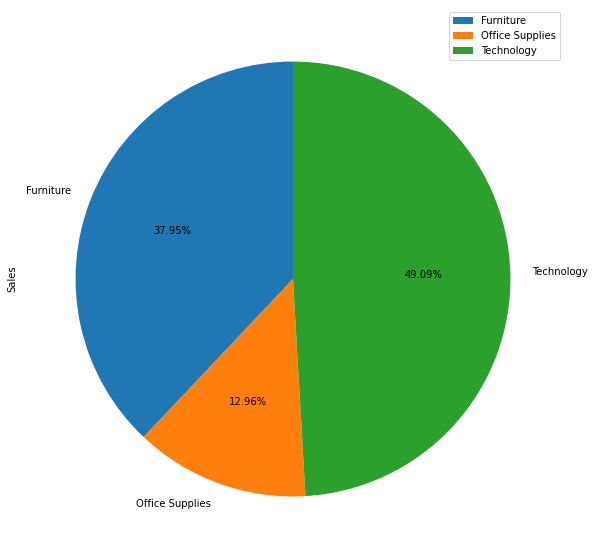

In [36]:
df.plot(kind='pie', subplots=True, startangle=90, autopct='%1.2f%%', figsize=(20,10))
plt.show()

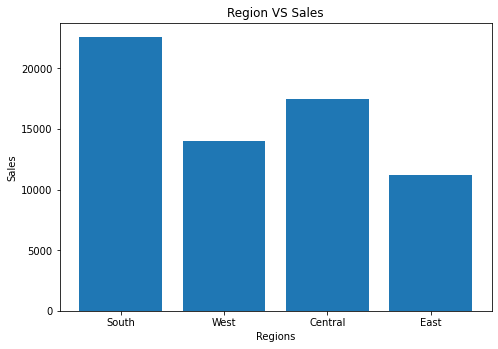

In [37]:
#Region wise sales plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(dataset['Region'],dataset['Sales'])
plt.title("Region VS Sales")
plt.xlabel("Regions")
plt.ylabel("Sales")
plt.show()

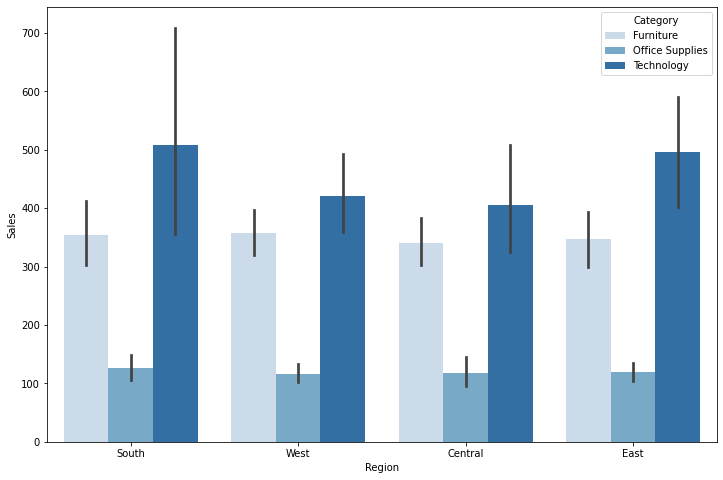

In [38]:
#Category wise sales in Each region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=dataset, palette="Blues")

<Figure size 1080x576 with 0 Axes>

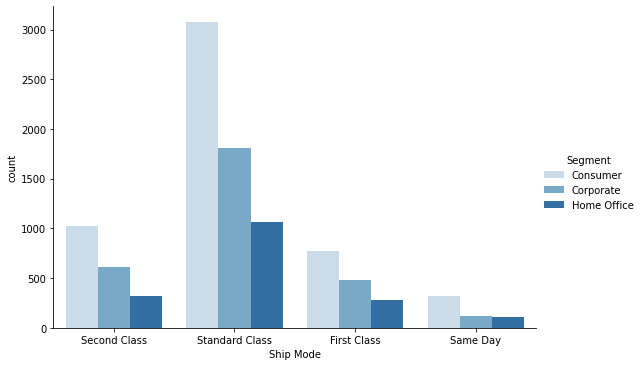

In [39]:
#Segment wise count of the ship modes
plt.figure(figsize=[15,8])
sns.catplot("Ship Mode", hue="Segment", data=dataset, kind="count", aspect=1.5, palette="Blues")

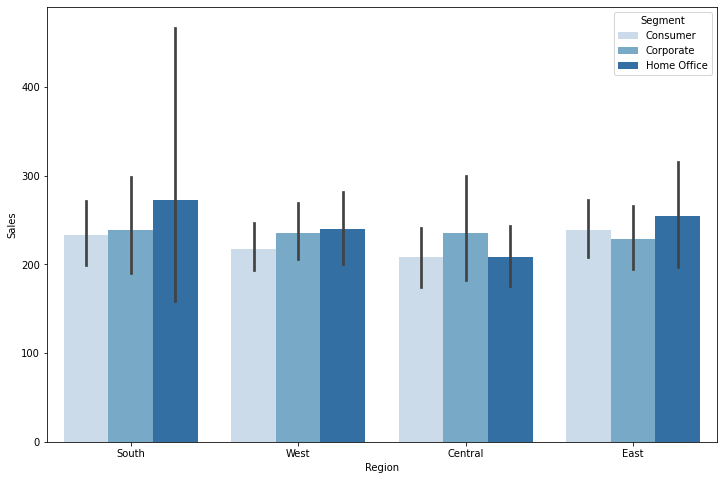

In [40]:
#Segment wise sales in Each region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=dataset, palette="Blues")

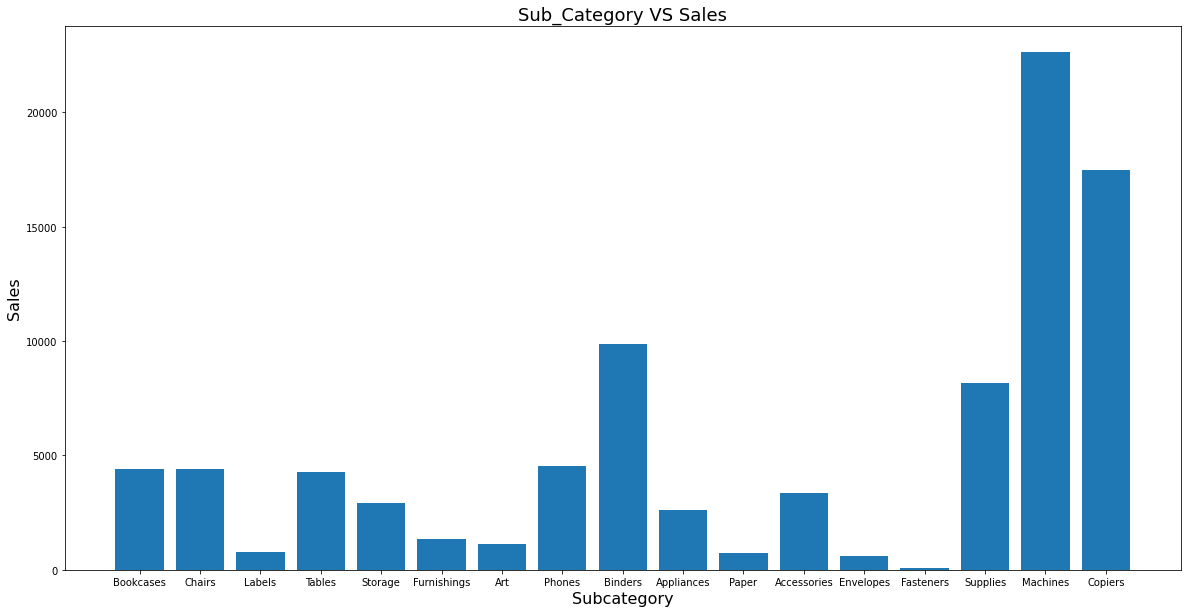

In [41]:
#Sales vs Subcategory
plt.figure(figsize=[20,10])
plt.bar("Sub-Category","Sales",data=dataset)
plt.title("Sub_Category VS Sales",fontsize=18)
plt.xlabel("Subcategory", fontsize=16)
plt.ylabel("Sales",fontsize=16)
plt.show()

In [42]:
#Insights based on Cities
grouped= dataset.groupby("City")
#Aggregated Sales per city
agg_sales=grouped['Sales'].agg(np.sum).sort_values(ascending=False).reset_index()
#Cities with highest total sales
agg_sales.head()

,City,Sales
0,New York City,256319.041
1,Los Angeles,175831.901
2,Seattle,119460.282
3,San Francisco,112577.172
4,Philadelphia,109061.461


In [43]:
#Aggregated Profit per city
agg_profit=grouped['Profit'].agg(np.sum).sort_values(ascending=False).reset_index()
#Cities with Highest total Profit
agg_profit.head()

,City,Profit
0,New York City,62013.8973
1,Los Angeles,30431.4267
2,Seattle,29121.6825
3,San Francisco,17466.1186
4,Detroit,13146.6935


In [44]:
#Aggregate Discount per city
agg_dist=grouped['Discount'].agg(np.sum).sort_values(ascending=False).reset_index()

#Cities with highest aggregated Discount
agg_dist.head()

,City,Discount
0,Philadelphia,175.30
1,Houston,142.74
2,Chicago,119.70
3,Dallas,56.30
4,Los Angeles,55.50


## Analysis from EDA
### 1. The states having the lowest dealings are District of Columbia, Maine, North Dakota, Wyoming, West Virginia 
### 2. State-wise Highest Loss = Ohio, State-wise Highest Profit =  Vemont
### 3. City-wise Highest Loss = Bethlehem, City-Wise Highest Profit = New York
### 4. Category-wise Lowest Profit = Furniture, Category-wise Highest Profit = Technology
### 5. Sub-Category-wise Highest Loss = Tables, Sub-Category-wise Highest Profit = Copiers
### 6. Category-wise Lowest Sales = Office Supplies, Category-wise Highest Sales = Technology
### 7. Region having Highest Sales = South, Region having Lowest Sales = East
### 8. In each and every every region, sales for Office Supplies are very poor. Furniture and Technology are well ahead.
### 9. Consumer count is highest in each case and they generally prefer Standard Class.
### 10. Supplies sub-category produces maximum sales followed by the Machines sub-category. Fasteners are lagging behind of all.
### 11. New York City has the most amount of sales followed by Los Angeles and San Fracisco.
### 12. Highest total discount is for Philadelphia followed by Houston and Chicago. 